In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
from necro_uncal_new_updated import model as model100
from necro_uncal_new_10tnf import model as model10
# from necro_uncal_new_1tnf import model as model1
# from necro_uncal_new_01tnf import model as model01
import pandas as pd
# alias_model_components(model100, model10, model1, model01)
from scipy import stats
from pysb.simulator import SimulationResult

In [2]:
print(list(model10.initial_conditions))

[(TNF(brec=None), Parameter('TNF_0', 233.0)), (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)), (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None), Parameter('TRADD_0', 4696.0)), (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'), Parameter('RIP1_0', 40000.0)), (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'), Parameter('TRAF_0', 11776.0)), (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)), (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)), (A20(brip=None), Parameter('A20_0', 9000.0)), (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)), (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)), (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)), (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)), (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)), (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 3799.0))]


In [3]:
clus0_10 = np.load('necro_pars_cluster0_5620.npy')
clus1_10 = np.load('necro_pars_cluster1_5620.npy')
clus2_10 = np.load('necro_pars_cluster2_5620.npy')

In [4]:
print(len(clus0_10))
print(len(clus1_10))
print(len(clus2_10))

1236
2536
1228


In [5]:
m = model10.components 

# 10 TNF A20 KO Clusters 0,1,2

In [6]:
print('running simulations cluster 0 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvera200 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
a20clus0 = solvera200.run(initials = {m.A20(brip = None):0},
                         param_values=clus0_10, num_processors = 10)
# simclus00.save('pydyno_s36prod_5k_5620_10tnf_cluster0pars_a20ko.h5',include_obs_exprs = True)
# c0_10_a20ko = simclus00.dataframe

2020-05-14 20:49:41.820 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created


running simulations cluster 0 10 TNF


2020-05-14 20:49:42.301 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:49:42.362 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:49:42.480 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-14 20:49:59.225 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:49:59.225 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:49:59.621 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [7]:
print('running simulations cluster 1 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvera201 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
a20clus1 = solvera201.run(initials = {m.A20(brip = None):0},
                         param_values=clus1_10, num_processors = 10)
# simclus11.save('pydyno_s36prod_5k_5620_10tnf_cluster1pars_a20ko.h5',include_obs_exprs = True)
# c1_10_a20ko = simclus11.dataframe

2020-05-14 20:49:59.628 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:49:59.632 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:49:59.663 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 1 10 TNF


2020-05-14 20:49:59.873 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-14 20:50:34.397 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:50:34.398 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:50:35.238 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [8]:
print('running simulations cluster 2 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvera202 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
a20clus2 = solvera202.run(initials = {m.A20(brip = None):0},
                         param_values=clus2_10, num_processors = 10)
# simclus22.save('pydyno_s36prod_5k_5620_10tnf_cluster2pars_a20ko.h5',include_obs_exprs = True)
# c2_10_a20ko = simclus22.dataframe

2020-05-14 20:50:35.244 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:50:35.248 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:50:35.280 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:50:35.396 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes


running simulations cluster 2 10 TNF


2020-05-14 20:50:52.492 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:50:52.493 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:50:52.881 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


# 10 TNF CYLD KO Clusters 0,1,2

In [9]:
print('running simulations cluster 0 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld0 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
cyldclus0 = solvercyld0.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus0_10, num_processors = 12)
# simclus0000.save('pydyno_s36prod_5k_5620_10tnf_cluster0pars_cyldko.h5',include_obs_exprs = True)
# c0_10_cyldko = simclus0000.dataframe

2020-05-14 20:50:52.887 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:50:52.891 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:50:52.923 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:50:53.041 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes


running simulations cluster 0 10 TNF


2020-05-14 20:51:05.122 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:51:05.123 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:51:05.516 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [10]:
print('running simulations cluster 1 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld1 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
cyldclus1 = solvercyld1.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus1_10, num_processors = 12)
# simclus1111.save('pydyno_s36prod_5k_5620_10tnf_cluster1pars_cyldko.h5',include_obs_exprs = True)
# c1_10_cyldko = simclus1111.dataframe

2020-05-14 20:51:05.523 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:51:05.528 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:51:05.559 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 1 10 TNF


2020-05-14 20:51:05.771 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes
2020-05-14 20:51:30.067 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:51:30.067 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:51:30.832 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [11]:
print('running simulations cluster 2 10 TNF')
tspan = np.linspace(0, 1440, 300)
solvercyld2 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
cyldclus2 = solvercyld2.run(initials = {m.CYLD(brip=None, btraf = None):0},
                         param_values=clus2_10, num_processors = 12)
# simclus2222.save('pydyno_s36prod_5k_5620_10tnf_cluster2pars_cyldko.h5',include_obs_exprs = True)
# c2_10_cyldko = simclus2222.dataframe

2020-05-14 20:51:30.840 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:51:30.844 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:51:30.875 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:51:30.992 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 12 processes


running simulations cluster 2 10 TNF


2020-05-14 20:51:42.979 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:51:42.980 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:51:43.441 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


# 10 TNF WT Clusters 0,1,2

In [12]:
print('running simulations cluster 0 10 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt0 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus0 = solverwt0.run(param_values=clus0_10, num_processors = 10)
# sim00.save('pydyno_s36prod_5k_5620_10tnf_cluster0pars_wt.h5',include_obs_exprs = True)
# wt10_0 = sim00.dataframe

2020-05-14 20:51:43.447 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:51:43.451 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:51:43.483 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:51:43.602 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes


running simulations cluster 0 10 TNF


2020-05-14 20:52:00.510 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:52:00.511 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:52:00.903 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [13]:
print('running simulations cluster 1 10 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt1 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus0 = solverwt1.run(param_values=clus1_10, num_processors = 10)
# sim11.save('pydyno_s36prod_5k_5620_10tnf_cluster1pars_wt.h5',include_obs_exprs = True)
# wt10_1 = sim11.dataframe

2020-05-14 20:52:00.909 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:52:00.914 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:52:00.945 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started


running simulations cluster 1 10 TNF


2020-05-14 20:52:01.163 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-14 20:52:35.310 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:52:35.311 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:52:36.079 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


In [14]:
print('running simulations cluster 2 10 TNF')
tspan = np.linspace(0, 1440, 300)
solverwt2 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
wtclus0 = solverwt2.run(param_values=clus2_10, num_processors = 10)
# sim22.save('pydyno_s36prod_5k_5620_10tnf_cluster2pars_wt.h5',include_obs_exprs = True)
# wt10_2 = sim22.dataframe

2020-05-14 20:52:36.092 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:52:36.096 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:52:36.127 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:52:36.246 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes


running simulations cluster 2 10 TNF


2020-05-14 20:52:53.450 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:52:53.451 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:52:53.835 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


# Percentiles for 100 TNF vs A20 KO in Clus 0,1,2

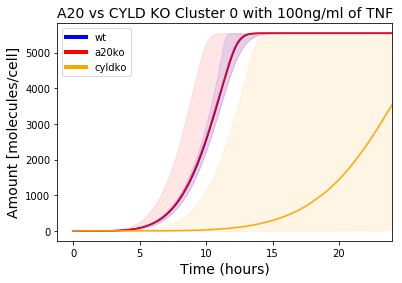

In [15]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([wtclus0.dataframe, a20clus0.dataframe, cyldclus0.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 100ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x101/60, y101*5544,
#              yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
#                     0.050022163974868*5544),
#              (400,400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x102/60, y102*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

# Percentiles for 10 TNF vs CYLD KO in Clus 0,1,2

In [ ]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([sim00.dataframe, c0_10_a20ko, c0_10_cyldko],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['wt', 'a20ko', 'cyldko'], prop={'size': 10}, loc = 'best')
plt.show()

In [18]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars = np.zeros((n_pars, len(model100.parameters)))

rate_params = model100.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model100.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model100.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars[i] = param_values
print(len(all_pars))

5000


In [19]:
par_files = np.load('most_likely_par_5k_necropydream_may62020.npy')
n_pars = len(par_files)
all_pars2 = np.zeros((n_pars, len(model10.parameters)))

rate_params = model10.parameters_rules() # these are only the parameters involved in the rules
param_values = np.array([p.value for p in model10.parameters]) # these are all the parameters
rate_mask = np.array([p in rate_params for p in model10.parameters])

for i in range(n_pars):
    par = par_files[i]
    param_values[rate_mask] = 10 ** par
    all_pars2[i] = param_values
print(len(all_pars2)) 

5000


In [20]:
tspan = np.linspace(0, 1440, 300)
solver100 = ScipyOdeSimulator(model100, tspan=tspan, verbose = True)
result100 = solver100.run(param_values=all_pars, num_processors = 10)

2020-05-14 20:57:39.365 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Simulator created
2020-05-14 20:57:39.376 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Equation mode set to "cython"
2020-05-14 20:57:39.417 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] Simulation(s) started
2020-05-14 20:57:39.825 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] Multi-processor (parallel) mode using 10 processes
2020-05-14 20:58:47.756 - pysb.simulator.scipyode - INFO - [necro_uncal_new_updated] All simulation(s) complete
2020-05-14 20:58:47.757 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor started
2020-05-14 20:58:49.334 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_updated] SimulationResult constructor finished


In [21]:
tspan = np.linspace(0, 1440, 300)
solver10 = ScipyOdeSimulator(model10, tspan=tspan, verbose = True)
result10 = solver10.run(param_values=all_pars2, num_processors = 10)

2020-05-14 20:58:49.343 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Simulator created
2020-05-14 20:58:49.347 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Equation mode set to "cython"
2020-05-14 20:58:49.379 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] Simulation(s) started
2020-05-14 20:58:49.779 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] Multi-processor (parallel) mode using 10 processes
2020-05-14 20:59:35.285 - pysb.simulator.scipyode - INFO - [necro_uncal_new_10tnf] All simulation(s) complete
2020-05-14 20:59:35.286 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor started
2020-05-14 20:59:36.805 - pysb.simulator.scipyode - DEBUG - [necro_uncal_new_10tnf] SimulationResult constructor finished


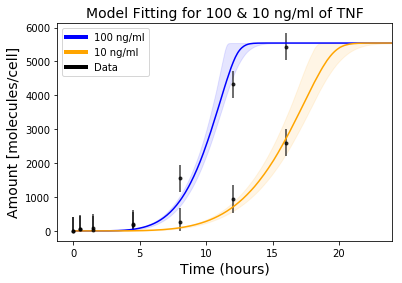

In [22]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result100.dataframe, result10.dataframe],
               keys=['mlkl100', 'mlkl10'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'mlkl100'): 'blue',
    ('MLKLa_obs', 'mlkl10'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('Model Fitting for 100 & 10 ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs_norm.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
plt.errorbar(x1001/60, y1001*5544,
             yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
             (400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x1002/60, y1002*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='orange', lw=4),
                Line2D([0], [0], color='black', lw=4)]
plt.legend(custom_lines, ['100 ng/ml', '10 ng/ml', 'Data'], prop={'size': 10}, loc = 'best')
plt.show()

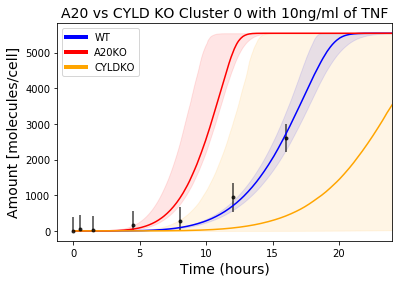

In [29]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result10.dataframe, a20clus0.dataframe, cyldclus0.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 0 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['WT', 'A20KO', 'CYLDKO'], prop={'size': 10}, loc = 'best')
plt.show()

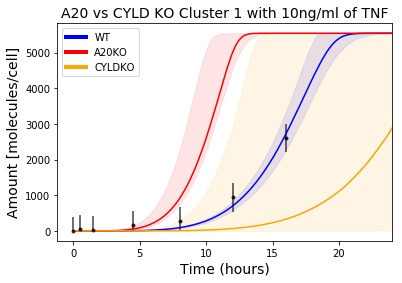

In [30]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result10.dataframe, a20clus1.dataframe, cyldclus1.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 1 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['WT', 'A20KO', 'CYLDKO'], prop={'size': 10}, loc = 'best')

plt.show()

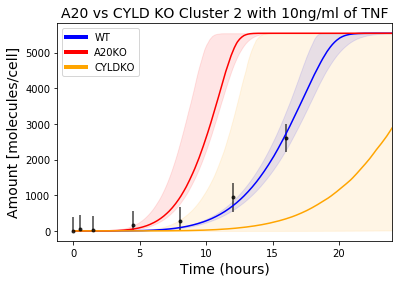

In [28]:
#FOR PLOTTING PERCENTILES 

# x10 = np.array([0, 30, 90, 270, 480,600, 720, 840, 960])
# # x102 = np.array([600, 720, 840, 960])
# y10 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,
#                 0.088128107774737, 0.17, 0.30055140114867, 0.47])
# # y102 = np.array([0.088128107774737, 0.17, 0.30055140114867, 0.47])

# x100 = np.array([0, 30, 90, 270,480, 600, 720, 840, 960])
# # x1002 = np.array([480, 600, 720, 840, 960])
# y100 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882,
#                   0.2798939020159581, 0.510, .8097294067, 0.95,0.98])

x1001 = np.array([0, 30, 90, 270])
x1002 = np.array([480, 720, 960])
y1001 = np.array([0, 0.00885691708746097,0.0161886154261265,0.0373005242261882])
y1002 = np.array([0.2798939020159581, .7797294067, 0.98])
# plt.figure()

x101 = np.array([0, 30, 90, 270, 480])
x102 = np.array([720, 960])
y101 = np.array([0, 0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868])
y102 = np.array([0.17, 0.47])
# Combine the results dataframes into a single dataframe with a 'group' index,
# in addition to "simulation" and "time" indexes
df = pd.concat([result10.dataframe, a20clus2.dataframe, cyldclus2.dataframe],
               keys=['wt', 'a20ko', 'cyldko'],
               names=['group', 'simulation', 'time'])

# Add observable/group pairs as needed
obs_to_plot = {
    ('MLKLa_obs', 'wt'): 'blue',
    ('MLKLa_obs', 'a20ko'): 'red',
    ('MLKLa_obs', 'cyldko'): 'orange'
}

lower_quantile = 0.1  # 10%
upper_quantile = 0.9  # 90%
median = 0.5

fig, ax = plt.subplots()
# plt.figure()
legend_keys = []
for obs_pair, colour in obs_to_plot.items():
    obs, group = obs_pair
    # Calculate 10%, 50%, and 90% quantiles for observable
    quantile_data = df[obs].loc[group].groupby(['time']).quantile(
        q=[lower_quantile, median, upper_quantile]).unstack()
    time_hrs = quantile_data.index / 60
    # Plot the median line (50% quantile) for the observable
    ax.plot(time_hrs, quantile_data.loc[:, median], color=colour, alpha = 1.0)
    # Plot the 10% and 90% quantiles as an envelope
    ax.fill_between(time_hrs,
                    quantile_data.loc[:, lower_quantile],
                    quantile_data.loc[:, upper_quantile],
                    color=colour,
                    alpha=.1)

# Add the legend

# plt.legend([f'{obs} {group}' for obs, group in obs_to_plot.keys()])
plt.title('A20 vs CYLD KO Cluster 2 with 10ng/ml of TNF',fontsize=14) # Title
plt.ylabel('Amount [molecules/cell]', fontsize = 14) # Y label
plt.xlabel('Time (hours)', fontsize = 14) # X label
plt.xlim(xmax =24)
# Add axis labels and title
# plt.set(xlabel='Time (hours)', ylabel='Amount [molecules/cell]', title=f'{model100.name}', fontsize = 14)
# Add grid
# ax.grid()
# plt.scatter(x101/60, y101*5544)
# plt.scatter(x101/60, y1002*5544)
# fig.savefig("necro_pydream_fitting_5k_5620_100_10tnf_wo_10_12hrs.pdf")
# plt.errorbar(x1001/60, y1001,
#              yerr=[(0, 0.00885691708746097,0.0161886154261265,0.0373005242261882),
#              (.10,.10,.10,.10)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002,
#              yerr= .10, fmt='.k', ecolor ='black', alpha = 0.75, label ='100 ng/ml', zorder = 2)
# plt.errorbar(x100/60, y10*5544, yerr=350, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100*5544, yerr=350, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x1001/60, y1001*5544,
#              yerr=[(0, 0.00885691708746097*5544,0.0161886154261265*5544,0.0373005242261882*5544),
#              (400,400,400,400)],
#                    fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
# plt.errorbar(x1002/60, y1002*5544,
#              yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x101/60, y101*5544,
             yerr=[(0, 0.0106013664572332*5544,0.00519576571714913*5544,0.02967443048221*5544,
                    0.050022163974868*5544),
             (400,400,400,400,400)],
                   fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
plt.errorbar(x102/60, y102*5544,
             yerr= 400, fmt='.k', ecolor ='black', alpha = 0.75, label ='10 ng/ml', zorder = 2)
custom_lines = [Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4),
                Line2D([0], [0], color='orange', lw=4)]
plt.legend(custom_lines, ['WT', 'A20KO', 'CYLDKO'], prop={'size': 10}, loc = 'best')
plt.show()

In [44]:
df1 = result10.dataframe
df2 = a20clus0.dataframe
df3 = cyldclus0.dataframe

In [31]:
from scipy.stats import sem, t
from scipy import mean
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

def mean_confidence_interval_new(data, confidence=0.95):
    n = len(data)
    m = mean(data)
    std_err = sem(data)
    h = std_err * t.ppf((1 + confidence) / 2, n - 1)
    return m, m-h, m+h

In [45]:
time = result10.tout[0]
idx = pd.MultiIndex.from_product([df1.columns,
                                  ['mean', 'mean_minus', 'mean_plus']],
                                 names=['species', 'CI'])

ci_df = pd.DataFrame(0, idx, time)

from scipy import stats
for sp in df1.columns:
    for t in time: 
        sp_values = df1.xs(t, level='time', drop_level=False)[sp].values # axis=1 if columns
        ci_df.loc[[sp], t] = mean_confidence_interval(sp_values)

In [35]:
time = a20clus0.tout[0]
idx = pd.MultiIndex.from_product([df2.columns,
                                  ['mean', 'mean_minus', 'mean_plus']],
                                 names=['species', 'CI'])

ci_df2 = pd.DataFrame(0, idx, time)

from scipy import stats
for sp in df2.columns:
    for t in time: 
        sp_values = df2.xs(t, level='time', drop_level=False)[sp].values # axis=1 if columns
        ci_df2.loc[[sp], t] = mean_confidence_interval(sp_values)

In [36]:
time = cyldclus0.tout[0]
idx = pd.MultiIndex.from_product([df3.columns,
                                  ['mean', 'mean_minus', 'mean_plus']],
                                 names=['species', 'CI'])

ci_df3 = pd.DataFrame(0, idx, time)

from scipy import stats
for sp in df3.columns:
    for t in time: 
        sp_values = df3.xs(t, level='time', drop_level=False)[sp].values # axis=1 if columns
        ci_df3.loc[[sp], t] = mean_confidence_interval(sp_values)

In [46]:
p = 300
mean_pmlkl = ci_df.loc['MLKLa_obs'][:1].values.reshape((p,))
upper_pmlkl = ci_df.loc['MLKLa_obs'][2:3].values.reshape((p,))
lower_pmlkl = ci_df.loc['MLKLa_obs'][1:2].values.reshape((p,))

mean_flip = ci_df.loc['Flip_obs'][:1].values.reshape((p,))
upper_flip = ci_df.loc['Flip_obs'][2:3].values.reshape((p,))
lower_flip = ci_df.loc['Flip_obs'][1:2].values.reshape((p,))

mean_C8flip = ci_df.loc['C8Flip_obs'][:1].values.reshape((p,))
upper_C8flip = ci_df.loc['C8Flip_obs'][2:3].values.reshape((p,))
lower_C8flip = ci_df.loc['C8Flip_obs'][1:2].values.reshape((p,))

mean_necro = ci_df.loc['RIP1RIP3unmod_obs'][:1].values.reshape((p,))
upper_necro = ci_df.loc['RIP1RIP3unmod_obs'][2:3].values.reshape((p,))
lower_necro = ci_df.loc['RIP1RIP3unmod_obs'][1:2].values.reshape((p,))

mean_ciub = ci_df.loc['CI_k63_obs'][:1].values.reshape((p,))
upper_ciub = ci_df.loc['CI_k63_obs'][2:3].values.reshape((p,))
lower_ciub = ci_df.loc['CI_k63_obs'][1:2].values.reshape((p,))

mean_cii = ci_df.loc['CII_RIP1deub_obs'][:1].values.reshape((p,))
upper_cii = ci_df.loc['CII_RIP1deub_obs'][2:3].values.reshape((p,))
lower_cii = ci_df.loc['CII_RIP1deub_obs'][1:2].values.reshape((p,))

In [38]:
p = 300
mean_pmlkl2 = ci_df2.loc['MLKLa_obs'][:1].values.reshape((p,))
upper_pmlkl2 = ci_df2.loc['MLKLa_obs'][2:3].values.reshape((p,))
lower_pmlkl2 = ci_df2.loc['MLKLa_obs'][1:2].values.reshape((p,))

mean_flip2 = ci_df2.loc['Flip_obs'][:1].values.reshape((p,))
upper_flip2 = ci_df2.loc['Flip_obs'][2:3].values.reshape((p,))
lower_flip2 = ci_df2.loc['Flip_obs'][1:2].values.reshape((p,))

mean_C8flip2 = ci_df2.loc['C8Flip_obs'][:1].values.reshape((p,))
upper_C8flip2 = ci_df2.loc['C8Flip_obs'][2:3].values.reshape((p,))
lower_C8flip2 = ci_df2.loc['C8Flip_obs'][1:2].values.reshape((p,))

mean_necro2 = ci_df2.loc['RIP1RIP3unmod_obs'][:1].values.reshape((p,))
upper_necro2 = ci_df2.loc['RIP1RIP3unmod_obs'][2:3].values.reshape((p,))
lower_necro2 = ci_df2.loc['RIP1RIP3unmod_obs'][1:2].values.reshape((p,))

mean_ciub2 = ci_df2.loc['CI_k63_obs'][:1].values.reshape((p,))
upper_ciub2 = ci_df2.loc['CI_k63_obs'][2:3].values.reshape((p,))
lower_ciub2 = ci_df2.loc['CI_k63_obs'][1:2].values.reshape((p,))

mean_cii2 = ci_df.loc['CII_RIP1deub_obs'][:1].values.reshape((p,))
upper_cii2 = ci_df.loc['CII_RIP1deub_obs'][2:3].values.reshape((p,))
lower_cii2 = ci_df.loc['CII_RIP1deub_obs'][1:2].values.reshape((p,))

In [39]:
p = 300
mean_pmlkl3 = ci_df3.loc['MLKLa_obs'][:1].values.reshape((p,))
upper_pmlkl3 = ci_df3.loc['MLKLa_obs'][2:3].values.reshape((p,))
lower_pmlkl3 = ci_df3.loc['MLKLa_obs'][1:2].values.reshape((p,))

mean_flip3 = ci_df3.loc['Flip_obs'][:1].values.reshape((p,))
upper_flip3 = ci_df3.loc['Flip_obs'][2:3].values.reshape((p,))
lower_flip3 = ci_df3.loc['Flip_obs'][1:2].values.reshape((p,))

mean_C8flip3 = ci_df3.loc['C8Flip_obs'][:1].values.reshape((p,))
upper_C8flip3 = ci_df3.loc['C8Flip_obs'][2:3].values.reshape((p,))
lower_C8flip3 = ci_df3.loc['C8Flip_obs'][1:2].values.reshape((p,))

mean_necro3 = ci_df3.loc['RIP1RIP3unmod_obs'][:1].values.reshape((p,))
upper_necro3 = ci_df3.loc['RIP1RIP3unmod_obs'][2:3].values.reshape((p,))
lower_necro3 = ci_df3.loc['RIP1RIP3unmod_obs'][1:2].values.reshape((p,))

mean_ciub3 = ci_df3.loc['CI_k63_obs'][:1].values.reshape((p,))
upper_ciub3 = ci_df3.loc['CI_k63_obs'][2:3].values.reshape((p,))
lower_ciub3 = ci_df3.loc['CI_k63_obs'][1:2].values.reshape((p,))

mean_cii2 = ci_df.loc['CII_RIP1deub_obs'][:1].values.reshape((p,))
upper_cii2 = ci_df.loc['CII_RIP1deub_obs'][2:3].values.reshape((p,))
lower_cii2 = ci_df.loc['CII_RIP1deub_obs'][1:2].values.reshape((p,))

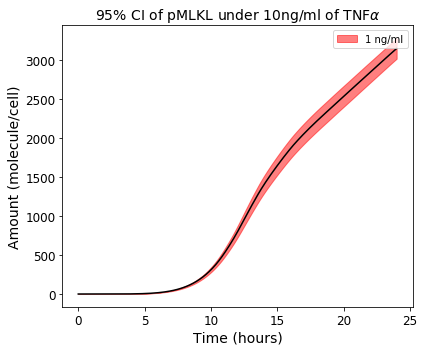

In [51]:
plt.figure(figsize = (6,5))
x100 = np.array([30, 90, 270, 480, 600, 720, 840, 960])
y100 = np.array([0.00885691708746097,0.0161886154261265,0.0373005242261882,0.2798939020159581,0.510, .7797294067, 0.95,1])
# plt.figure()

x10 = np.array([30, 90, 270, 480, 600, 720, 840, 960])
y10 = np.array([0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,0.088128107774737, 0.17,0.30055140114867, 0.47])
# plt.subplot(144)
# plt.plot(time/60, mean_pmlkl, color = 'black',  zorder = 2)
# plt.fill_between(time/60, lower_pmlkl, upper_pmlkl, color = 'green', label ='100 ng/ml',zorder = 1, alpha=0.5)
# plt.plot(time/60, mean_pmlkl2, color = 'black',  zorder = 2)
# plt.fill_between(time/60, lower_pmlkl2, upper_pmlkl2, color = 'blue', label ='10 ng/ml',zorder = 1, alpha=0.5)
plt.plot(time/60, mean_pmlkl3, color = 'black',  zorder = 2)
plt.fill_between(time/60, lower_pmlkl3, upper_pmlkl3, color = 'red', label ='1 ng/ml',zorder = 1, alpha=0.5)
# plt.plot(time/60, mean_pmlkl4, color = 'black', zorder = 2)
# plt.fill_between(time/60, lower_pmlkl4, upper_pmlkl4, color = 'purple', label ='0.1 ng/ml',zorder = 1, alpha=0.5)
# plt.errorbar(x100/60, y100*5544, yerr=210, fmt='.k', ecolor ='green', alpha = 0.5, label ='100 ng/ml')
# plt.errorbar(x100/60, y10*5544, yerr=210, fmt='.k', ecolor = 'blue', alpha = 0.5, label ='10 ng/ml')
# plt.errorbar(x100/60, y100, yerr=0.05, fmt='.k')
# plt.scatter(x10/60, y10*5544, color = 'blue', alpha = 0.3)
# plt.scatter(x100/60, y100*5544,  color = 'green', alpha = 0.3)
# plt.xlim(xmax = 17, xmin = 0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Amount (molecule/cell)', fontsize = 14)
plt.legend()
plt.title(r'95% CI of pMLKL under 10ng/ml of TNF$\alpha$', fontsize = 14)
plt.tight_layout()
# plt.savefig('pMLKL95CI_100TNF_10000pydream_notnormwdata.pdf', format='pdf')
#plt.savefig('alltnfmoddatanew.pdf', format='pdf')

plt.show()

In [ ]:
plt.figure(figsize = (20,5))
# plt.figure()
plt.subplot(141)
plt.plot(time/60, mean_flip, color = 'black', zorder = 2)
plt.fill_between(time/60, lower_flip, upper_flip, color = 'green', label ='100 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_flip2, color = 'black', zorder = 2)
plt.fill_between(time/60, lower_flip2, upper_flip2, color = 'blue', label ='10 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_flip3, color = 'black', zorder = 2)
plt.fill_between(time/60, lower_flip3, upper_flip3, color = 'red', label ='1 ng/ml',zorder = 1, alpha=0.3)
# plt.plot(time/60, mean_flip4, color = 'black', zorder = 2)
# plt.fill_between(time/60, lower_flip4, upper_flip4, color = 'purple', label ='0.1 ng/ml',zorder = 1, alpha=0.3)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(xmax = 24, xmin = 0)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Amount (molecule/cell)', fontsize = 14)
plt.legend()
plt.title(r'95% CI of cFlip-L under 10ng/ml of TNF$\alpha$', fontsize = 14)

# plt.figure()
plt.subplot(142)
plt.plot(time/60, mean_C8flip , color = 'black', zorder = 2)
plt.fill_between(time/60, lower_C8flip , upper_C8flip , color = 'green', label ='100 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_C8flip2 , color = 'black', zorder = 2)
plt.fill_between(time/60, lower_C8flip2 , upper_C8flip2 , color = 'blue', label ='10 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_C8flip3 , color = 'black', zorder = 2)
plt.fill_between(time/60, lower_C8flip3 , upper_C8flip3 , color = 'red', label ='1 ng/ml',zorder = 1, alpha=0.3)
# plt.plot(time/60, mean_C8flip4 , color = 'black', zorder = 2)
# plt.fill_between(time/60, lower_C8flip4 , upper_C8flip4 , color = 'purple', label ='0.1 ng/ml',zorder = 1, alpha=0.3)
plt.xlim(xmax = 24, xmin = 0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Amount (molecule/cell)', fontsize = 14)
plt.legend()
plt.title(r'95% CI of C8Flip 10ng/ml of TNF$\alpha$', fontsize = 14)

plt.subplot(143)
plt.plot(time/60, mean_necro, color = 'black', zorder = 2)
plt.fill_between(time/60, lower_necro, upper_necro,color = 'green', label ='100 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_necro2, color = 'black',  zorder = 2)
plt.fill_between(time/60, lower_necro2, upper_necro2,color = 'blue', label ='10 ng/ml',zorder = 1,alpha=0.3)
plt.plot(time/60, mean_necro3, color = 'black', zorder = 2)
plt.fill_between(time/60, lower_necro3, upper_necro3,color = 'red', label ='1 ng/ml',zorder = 1, alpha=0.3)
# plt.plot(time/60, mean_necro4, color = 'black', zorder = 2)
# plt.fill_between(time/60, lower_necro4, upper_necro4,color = 'purple', label ='0.1 ng/ml',zorder = 1, alpha=0.3)
plt.xlim(xmax = 24, xmin = 0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Amount (molecule/cell)', fontsize = 14)
plt.legend()
plt.title(r'95% CI of Necrosome under 10ng/ml of TNF$\alpha$', fontsize = 14)

x100 = np.array([30, 90, 270, 480, 600, 720, 840, 960])
y100 = np.array([0.00885691708746097,0.0161886154261265,0.0373005242261882,0.2798939020159581,0.510, .7797294067, 0.95,1])
# plt.figure()

x10 = np.array([30, 90, 270, 480, 600, 720, 840, 960])
y10 = np.array([0.0106013664572332,0.00519576571714913,0.02967443048221,0.050022163974868,0.108128107774737, 0.21,0.36055140114867, 0.57])
plt.subplot(144)
plt.plot(time/60, mean_pmlkl, color = 'black',  zorder = 2)
plt.fill_between(time/60, lower_pmlkl, upper_pmlkl, color = 'green', label ='100 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_pmlkl2, color = 'black',  zorder = 2)
plt.fill_between(time/60, lower_pmlkl2, upper_pmlkl2, color = 'blue', label ='10 ng/ml',zorder = 1, alpha=0.3)
plt.plot(time/60, mean_pmlkl2, color = 'black',  zorder = 2)
plt.fill_between(time/60, lower_pmlkl3, upper_pmlkl3, color = 'red', label ='1 ng/ml',zorder = 1, alpha=0.3)
# plt.plot(time/60, mean_pmlkl4, color = 'black', zorder = 2)
# plt.fill_between(time/60, lower_pmlkl4, upper_pmlkl4, color = 'purple', label ='0.1 ng/ml',zorder = 1, alpha=0.3)
# plt.scatter(x10/60, y10*5544, color = 'blue', alpha = 0.3)
# plt.scatter(x100/60, y100*5544,  color = 'green', alpha = 0.3)
plt.xlim(xmax = 24, xmin = 0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Time (hours)', fontsize = 14)
plt.ylabel('Amount (molecule/cell)', fontsize = 14)
plt.legend()
plt.title(r'95% CI of pMLKL under 10ng/ml of TNF$\alpha$', fontsize = 14)
plt.tight_layout()
# plt.savefig('Necroptosis95CI_allTNF_10000pydream_notnormwdata.pdf', format='pdf')
plt.show()